In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import norm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
retail1 = pd.read_excel('/content/drive/MyDrive/RetailPulseAssignmentData.xlsx',sheet_name='Year 2009-2010')
retail2 = pd.read_excel('/content/drive/MyDrive/RetailPulseAssignmentData.xlsx',sheet_name='Year 2010-2011')

In [ ]:
retail1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
retail2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df1 = retail1.copy()
df2 = retail2.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
df1.isnull().sum()
#df2.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [6]:
df_both = pd.concat([df1,df2],ignore_index=True)
df_both.shape

(1067371, 8)

In [7]:
df_both['amount']= df_both['Quantity']*df_both['Price']

In [8]:
from datetime import date, datetime , timedelta

In [9]:
df_both['InvoiceDate_year'] = df_both['InvoiceDate'].dt.year
df_both['InvoiceDate_month']= df_both['InvoiceDate'].dt.month
df_both.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,amount,InvoiceDate_year,InvoiceDate_month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12


In [ ]:
print(df_both['Customer ID'].nunique())
print(df_both['StockCode'].nunique())
print(df_both['Description'].nunique())

5942
5305
5698


**Dropping columns with quantity and price values in negative**

In [10]:
for i in range(len(df_both)):
  if (df_both['Quantity'][i]<0) and (df_both['Price'][i]==0):
     df_both.drop(i,inplace=True)
  elif(df_both['Price'][i]<=0):
     df_both.drop(i,inplace=True)
  

In [ ]:
df_both.shape

(1061164, 11)

In [11]:
df_both=df_both[(df_both['Customer ID'].isnull()==False)]
df_both.shape

(824293, 11)

In [12]:
numerical_col=['Customer ID','Quantity','Price','amount']


In [13]:
numeric_df=df_both[numerical_col]

In [14]:
numeric_df.dropna()

,Customer ID,Quantity,Price,amount
0,13085.0,12,6.95,83.40
1,13085.0,12,6.75,81.00
2,13085.0,12,6.75,81.00
3,13085.0,48,2.10,100.80
4,13085.0,24,1.25,30.00
...,...,...,...,...
1067366,12680.0,6,2.10,12.60
1067367,12680.0,4,4.15,16.60
1067368,12680.0,4,4.15,16.60
1067369,12680.0,3,4.95,14.85


In [15]:
agg = numeric_df.groupby('Customer ID').agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

In [16]:
agg.columns = ['Customer ID','Quantity_count','Quantity_mean','Quantity_max','Quantity_min','Quantity_sum',
                             'Price_count', 'Price_mean', 'Price_max', 'Price_min', 'Price_sum',
                             'amount_count', 'amount_mean', 'amount_max', 'amount_min', 'amount_sum']

In [ ]:
#Customer ID wise aggregate to analyze customer both revenue and quantity wise
agg

In [17]:
agg.drop(['Price_count','amount_count'],axis=1)

,Customer ID,Quantity_count,Quantity_mean,Quantity_max,Quantity_min,Quantity_sum,Price_mean,Price_max,Price_min,Price_sum,amount_mean,amount_max,amount_min,amount_sum
0,12346.0,48,1.083333,74215,-74215,52,12.092500,142.31,1.00,580.44,-1.347500,77183.60,-77183.60,-64.68
1,12347.0,253,12.988142,240,2,3286,2.546087,12.75,0.25,644.16,22.266087,249.60,5.04,5633.32
2,12348.0,51,53.215686,144,1,2714,3.786275,40.00,0.29,193.10,39.596078,240.00,1.00,2019.40
3,12349.0,180,8.994444,48,-1,1619,8.358833,300.00,0.42,1504.59,24.469667,300.00,-14.95,4404.54
4,12350.0,17,11.588235,24,1,197,3.841176,40.00,0.85,65.30,19.670588,40.00,8.50,334.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5934,18283.0,986,1.757606,13,1,1733,1.744168,15.95,0.21,1719.75,2.775507,21.90,0.21,2736.65
5935,18284.0,29,17.000000,50,-1,493,4.003103,50.00,0.21,116.09,15.057931,50.00,-25.00,436.68
5936,18285.0,12,12.083333,80,1,145,8.350000,50.00,0.65,100.20,35.583333,204.00,7.80,427.00
5937,18286.0,70,8.457143,36,-8,592,4.379286,50.00,0.21,306.55,16.977571,74.85,-54.00,1188.43


RFM Model for Customer Value:

Recency: The value of how recently a customer purchased at the establishment

Frequency: How frequent the customer’s transactions are at the establishment

Monetary value: The dollar (or pounds in our case) value of all the transactions that the customer made at the establishment

**MONETARY**


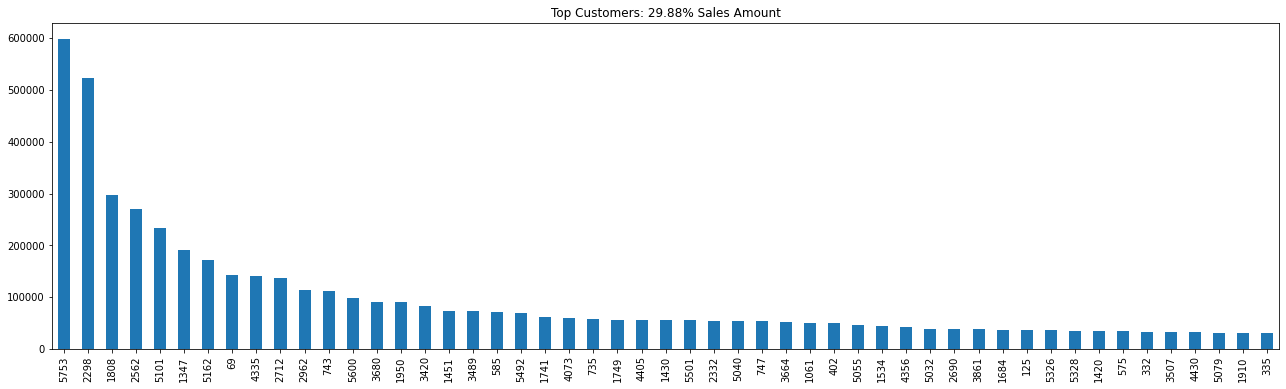

In [18]:
fig = plt.figure(figsize=(22, 6))

PercentSales =  np.round((agg.amount_sum.sort_values(ascending = False)[:51].sum()/agg.amount_sum.sum().sum()) * 100, 2)


g = agg.amount_sum.sort_values(ascending = False)[:51].plot(kind='bar', title='Top Customers: {:3.2f}% Sales Amount'.format(PercentSales))



In [21]:
plt.savefig("Monetary.png")

<Figure size 432x288 with 0 Axes>

**RECENCY**

In [41]:
refrence_date = df_both.InvoiceDate.max() + timedelta(days = 1)
print('Reference Date:', refrence_date)
df_both['days_since_last_purchase'] = (refrence_date - df_both.InvoiceDate).astype('timedelta64[D]')
customer_history_df =  df_both[['Customer ID', 'days_since_last_purchase']].groupby("Customer ID").min().reset_index()
customer_history_df.rename(columns={'days_since_last_purchase':'recency'}, inplace=True)
customer_history_df

Reference Date: 2011-12-10 12:50:00


,Customer ID,recency
0,12346.0,326.0
1,12347.0,2.0
2,12348.0,75.0
3,12349.0,19.0
4,12350.0,310.0
...,...,...
5934,18283.0,4.0
5935,18284.0,430.0
5936,18285.0,661.0
5937,18286.0,477.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

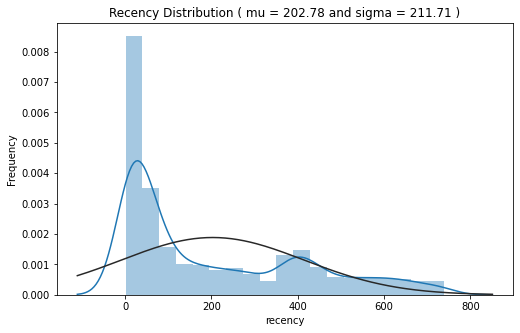

In [23]:
fig = plt.figure(figsize=(18,5))

#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(customer_history_df.recency)

#Kernel Density plot
fig1 = fig.add_subplot(121)
sns.distplot(customer_history_df.recency, fit=norm)
fig1.set_title('Recency Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
fig1.set_xlabel('recency')
fig1.set_ylabel('Frequency')

**FREQUENCY**

In [ ]:
customer_freq = (df_both[['Customer ID', 'Invoice']].groupby(["Customer ID", 'Invoice']).count().reset_index()).\
               groupby(["Customer ID"]).count().reset_index()
customer_freq.rename(columns={'Invoice':'frequency'},inplace=True)
customer_history_df = customer_history_df.merge(customer_freq)
customer_history_df.rename(columns={'Invoice':'frequency'},inplace=True)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

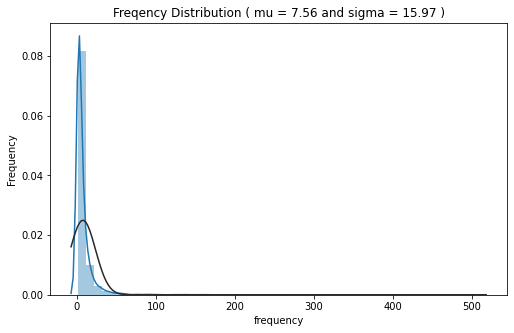

In [51]:
fig = plt.figure(figsize=(18,5))

#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(customer_history_df.frequency)

#Kernel Density plot
fig1 = fig.add_subplot(121)
sns.distplot(customer_history_df.frequency, fit=norm)
fig1.set_title('Freqency Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
fig1.set_xlabel('frequency')
fig1.set_ylabel('Frequency')

In [56]:
customer_history_df = customer_history_df.merge(df_both[['Customer ID','amount']].groupby("Customer ID").sum().reset_index())
customer_history_df

,Customer ID,recency,frequency,amount
0,12346.0,326.0,17,-64.68
1,12347.0,2.0,8,5633.32
2,12348.0,75.0,5,2019.40
3,12349.0,19.0,5,4404.54
4,12350.0,310.0,1,334.40
...,...,...,...,...
5934,18283.0,4.0,22,2736.65
5935,18284.0,430.0,2,436.68
5936,18285.0,661.0,1,427.00
5937,18286.0,477.0,3,1188.43


In [57]:
customer_history_df.describe()

,Customer ID,recency,frequency,amount
count,5939.000000,5939.000000,5939.000000,5939.000000
mean,15317.133693,202.784812,7.555144,2803.214748
std,1715.592756,211.727459,15.970199,13977.310119
min,12346.000000,1.000000,1.000000,-25111.090000
25%,13831.500000,25.000000,2.000000,325.985000
50%,15318.000000,96.000000,4.000000,844.600000
75%,16802.500000,381.000000,8.000000,2182.855000
max,18287.000000,739.000000,510.000000,598215.220000


In [61]:
quantiles = customer_history_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
    
def RFMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
customer_history_df['R'] = customer_history_df['recency'].apply(RFMScore, args=('recency',quantiles,))
customer_history_df['F'] = customer_history_df['frequency'].apply(RFMScore, args=('frequency',quantiles,))
customer_history_df['M'] = customer_history_df['amount'].apply(RFMScore, args=('amount',quantiles,))

customer_history_df


,Customer ID,recency,frequency,amount,R,F,M
0,12346.0,326.0,17,-64.68,3,4,1
1,12347.0,2.0,8,5633.32,1,3,4
2,12348.0,75.0,5,2019.40,2,3,3
3,12349.0,19.0,5,4404.54,1,3,4
4,12350.0,310.0,1,334.40,3,1,2
...,...,...,...,...,...,...,...
5934,18283.0,4.0,22,2736.65,1,4,4
5935,18284.0,430.0,2,436.68,4,1,2
5936,18285.0,661.0,1,427.00,4,1,2
5937,18286.0,477.0,3,1188.43,4,2,3


In [64]:
# Calculate RFM_Score
customer_history_df['RFM_Score'] = customer_history_df[['R','F','M']].sum(axis=1)

customer_history_df

,Customer ID,recency,frequency,amount,R,F,M,RFM_Score
0,12346.0,326.0,17,-64.68,3,4,1,8
1,12347.0,2.0,8,5633.32,1,3,4,8
2,12348.0,75.0,5,2019.40,2,3,3,8
3,12349.0,19.0,5,4404.54,1,3,4,8
4,12350.0,310.0,1,334.40,3,1,2,6
...,...,...,...,...,...,...,...,...
5934,18283.0,4.0,22,2736.65,1,4,4,9
5935,18284.0,430.0,2,436.68,4,1,2,7
5936,18285.0,661.0,1,427.00,4,1,2,7
5937,18286.0,477.0,3,1188.43,4,2,3,9


In [27]:
categorical_cols = ['Country',	'InvoiceDate_year',	'InvoiceDate_month']
year_col= ['InvoiceDate_year',	'InvoiceDate_month','amount']
year_analysis= df_both[year_col]


In [28]:
#for seasonal and yearly(peak sale months) analysis
year_analysis.groupby(['InvoiceDate_year',	'InvoiceDate_month']).sum('amount')


amount
InvoiceDate_year InvoiceDate_month             
2009             12                  663272.050
2010             1                   531952.902
                 2                   489399.586
                 3                   635996.481
                 4                   560635.022
                 5                   559924.550
                 6                   571459.910
                 7                   562785.900
                 8                   587256.460
                 9                   781033.301
                 10                  964989.780
                 11                 1134879.282
                 12                  859227.370
2011             1                   475074.380
                 2                   436546.150
                 3                   579964.610
                 4                   426047.851
                 5                   648251.080
                 6                   608013.160
                 7                   574238.481
                 8                   616368.000
                 9                   931440.372
                 10                  974603.590
                 11                 1132407.740
                 12                  342524.380

In [ ]:
year_analysis.to_csv('yearly_analysis.csv')

**COUNTRY WISE SALES REVENUE ANALYSIS**

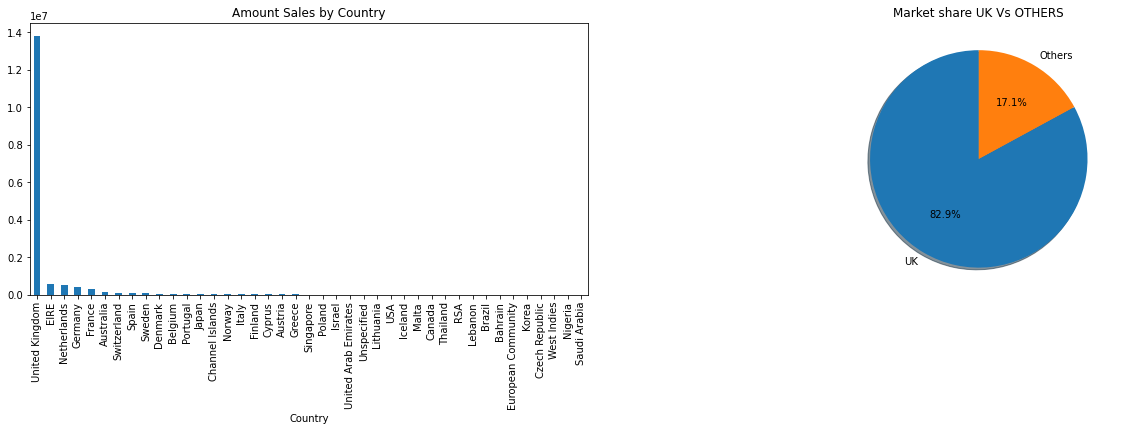

In [29]:

fig = plt.figure(figsize=(22, 5))
f1 = fig.add_subplot(121)
g = df_both.groupby(["Country"])['amount'].sum().sort_values(ascending = False).plot(kind='bar', title='Amount Sales by Country')

df_both['Max_to_total_marketshare'] = df_both.Country.apply(lambda x: 'UK' if x=='United Kingdom' else 'Others' )
f2 = fig.add_subplot(122)
market = df_both.groupby(["Max_to_total_marketshare"]).amount.sum().sort_values(ascending = False)
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Market share UK Vs OTHERS')
plt.show()

In [ ]:
plt.savefig("Market.png")

**TOP SOLD(POPULAR) PRODUCTS:**
Any order placed for any product is confirmed by the Unique Invoice for every new order

In [30]:
product = df_both[["Description", "Invoice"]].groupby(["Description"]).Invoice.unique().agg(np.size).sort_values(ascending = False)

In [31]:
AmountSum = df_both.groupby(["Description"]).amount.sum().sort_values(ascending = False)

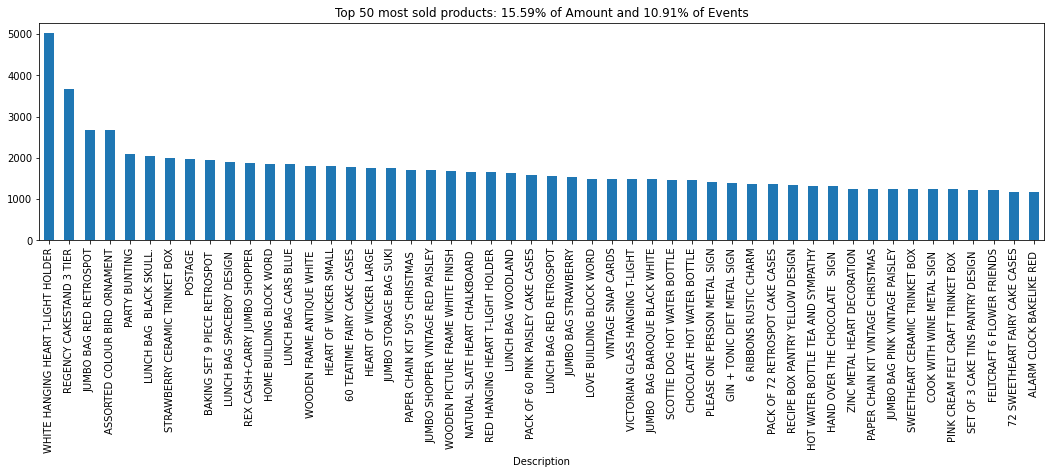

In [32]:
fig = plt.figure(figsize=(18,4))
Top50products = list(product[:50].index)

Percent_By_revenue =  np.round((AmountSum[Top50products].sum()/AmountSum.sum()) * 100, 2)
Percent_by_event = np.round((product[Top50products].sum()/product.sum()) * 100, 2)
g = product[Top50products].plot(kind='bar', title='Top 50 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.\
                       format(Percent_By_revenue,Percent_by_event))

In [33]:
plt.savefig("Product_Event.png")

<Figure size 432x288 with 0 Axes>

**TOP REVENUE GENERATING PRODUCTS**: A function of unitprice and the quantity of each order. 

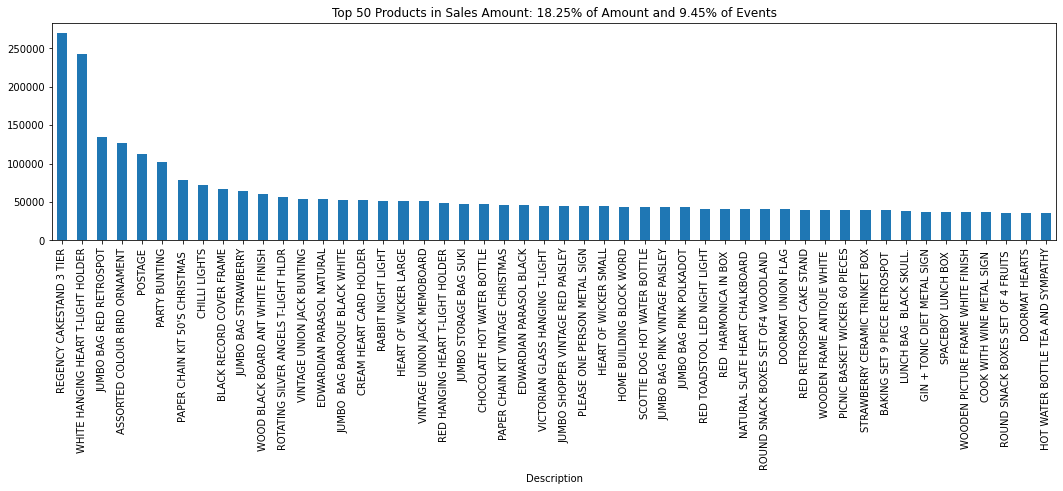

In [34]:
fig = plt.figure(figsize=(18, 4))
Top50products = list(AmountSum[:50].index)
Percent_by_revenue =  np.round((AmountSum[Top50products].sum()/AmountSum.sum()) * 100, 2)
Percent_by_Events = np.round((product[Top50products].sum()/product.sum()) * 100, 2)
g = AmountSum[Top50products].plot(kind='bar', 
         title='Top 50 Products in Sales Amount: {:3.2f}% of Amount and {:3.2f}% of Events'.format(Percent_by_revenue, Percent_by_Events))

In [35]:
plt.savefig("Product_revenue.png")

<Figure size 432x288 with 0 Axes>